# Exercise: Classification of air showers measured with the MAGIC telescope

The [MAGIC telescope](https://en.wikipedia.org/wiki/MAGIC_(telescope)) is a Cherenkov telescope situated on La Palma, one of the Canary Islands. The [MAGIC machine learning dataset](https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope) can be obtained from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).

The task is to separate signal events (gamma showers) and background events (hadron showers) based on the features of a measured Cherenkov shower.

The features of a shower are:

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10. fDist:    continuous  # distance from origin to center of ellipse [mm]
    11. class:    g,h         # gamma (signal), hadron (background)

g = gamma (signal):     12332
h = hadron (background): 6688

For technical reasons, the number of h events is underestimated.
In the real data, the h class represents the majority of the events.

You can find further information about the MAGIC telescope and the data discrimination studies in the following [paper](https://reader.elsevier.com/reader/sd/pii/S0168900203025051?token=8A02764E2448BDC5E4DD0ED53A301295162A6E9C8F223378E8CF80B187DBFD98BD3B642AB83886944002206EB1688FF4)  (R. K. Bock et al., "Methods for multidimensional event classification: a case studyusing images from a Cherenkov gamma-ray telescope" NIM A  516 (2004) 511-528) (You need to be within the university network to get free access.) 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
filename = "https://www.physi.uni-heidelberg.de/~reygers/lectures/2021/ml/data/magic04_data.txt"
df = pd.read_csv(filename, engine='python')

In [4]:
# use categories 1 and 0 insted of "g" and "h"
df['class'] = df['class'].map({'g': 1, 'h': 0})

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

#### a) Create for each variable a figure with a plot for gammas and hadrons overlayed.

In [6]:
import matplotlib.pyplot as plt

In [46]:
df0 = df[df['class'] == 0] # hadron data set
df1 = df[df['class'] == 1] # gamma data set

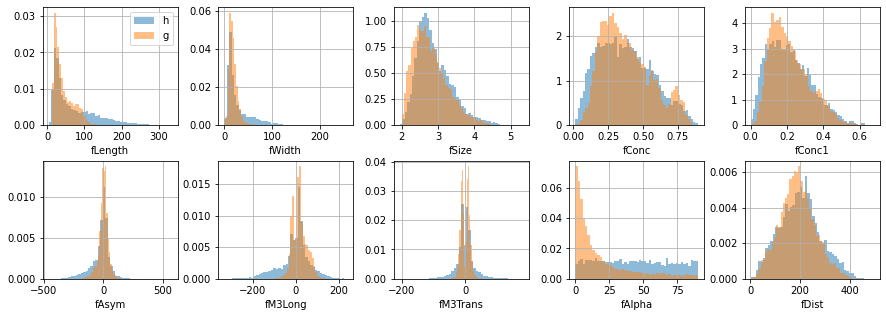

In [45]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
plt.subplots_adjust(hspace = 0.3, wspace=0.3)

for i in range(10):
    kx = i // 5
    ky = i % 5
    axs[kx, ky].set_xlabel(df0.columns[i])
    df0.iloc[:,i].hist(ax = axs[kx, ky], bins = 50, alpha=0.5, density=True, label='h')
    df1.iloc[:,i].hist(ax = axs[kx, ky], bins = 50, alpha=0.5, density=True, label='g')

axs[0, 0].legend()

#### b) Create training and test data set. The tast data should amount to 50\% of the total data set.

In [21]:
y = df['class'].values
X = df[[col for col in df.columns if col!="class"]]

### YOUR CODE ### 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

#### c) Define the logistic regressor and fit the training data

In [15]:
from sklearn import linear_model

# define logistic regressor

### YOUR CODE ###

logreg=linear_model.LogisticRegression(fit_intercept=True,
                                       penalty='none',
                                       max_iter=1000,
                                       tol=1E-5)

# fit training data

### YOUR CODE ###

import time
start_time = time.time()
logreg.fit(X_train, y_train)
run_time = time.time() - start_time

In [16]:
y_pred = logreg.predict(X_test)

#### d) Determine the Model Accuracy, the AUC score and the Run time

In [17]:
from sklearn.metrics import roc_auc_score

### YOUR CODE ###

print("Model Accuracy: {:.2f}%".format(100*logreg.score(X_test, y_test)))
print("AUC score: {:.2f}".format(roc_auc_score(y_test,y_pred)))
print("Run time: {:.2f} sec\n\n".format(run_time))

Model Accuracy: 78.99%
AUC score: 0.74
Run time: 0.22 sec




#### e) Plot the ROC curve (Backgropund Rejection vs signal efficiency)

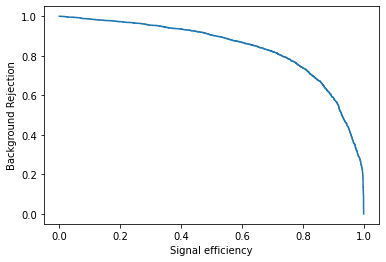

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
%matplotlib inline

y_pred_prob = logreg.predict_proba(X_test) # predicted probabilities

### YOUR CODE ###

fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(tpr, 1-fpr)
plt.xlabel('Signal efficiency')
plt.ylabel('Background Rejection');

#### f) Plot the Signal efficiency vs. the Background efficiency and compare it to the corresponding plot in the paper

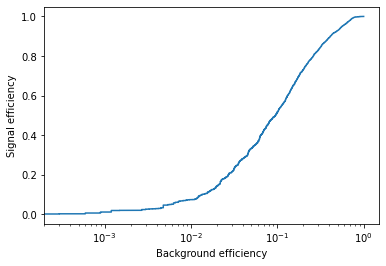

In [19]:
### YOUR CODE ###
plt.plot(fpr, tpr)
plt.xscale("log")
plt.xlabel('Background efficiency')
plt.ylabel('Signal efficiency');